In [1]:
import pandas as pd


logins_df = pd.read_json('logins.json')

ultimate_data_df = pd.read_json('ultimate_data_challenge.json')

print(logins_df.head())
print(ultimate_data_df.head())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Andr

/var/folders/9z/xd6qhps576s3xjk8023gqphw0000gn/T/ipykernel_22557/2398053086.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  login_counts = logins_df.set_index('login_time').resample('15T').size()


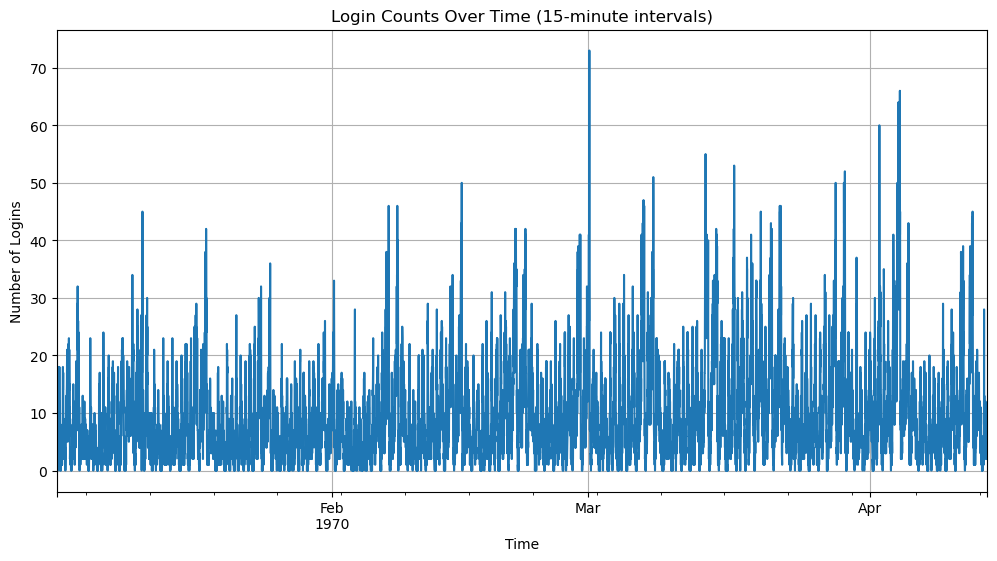

In [2]:
import matplotlib.pyplot as plt

#convert the 'login_time' column to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

#resample the data by 15-minute intervals and count the logins
login_counts = logins_df.set_index('login_time').resample('15T').size()

#plot the time series of login counts
plt.figure(figsize=(12, 6))
login_counts.plot()
plt.title('Login Counts Over Time (15-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()


/var/folders/9z/xd6qhps576s3xjk8023gqphw0000gn/T/ipykernel_22557/1325390625.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = logins_df.set_index('login_time').resample('H').size()


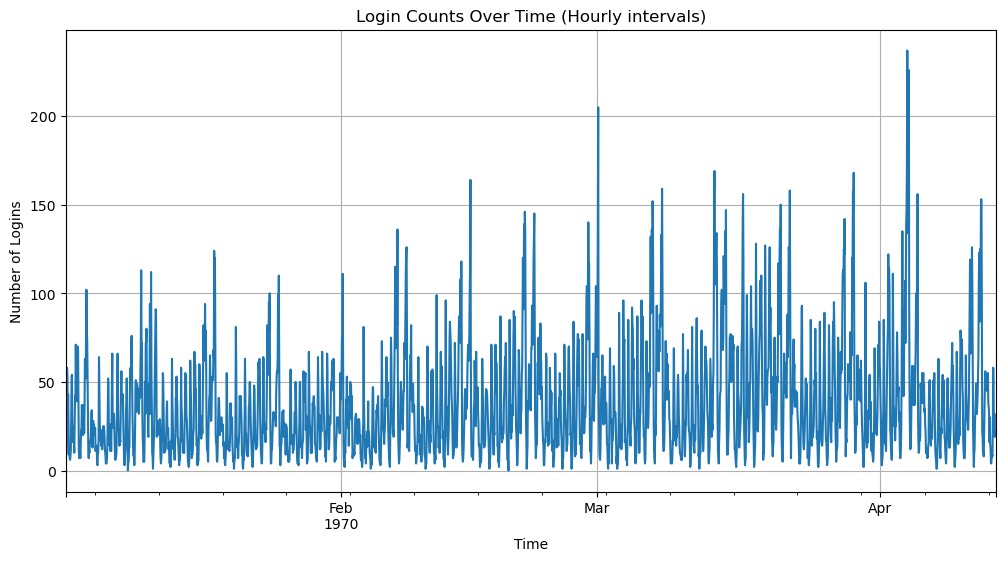

In [3]:
#resample the data by hourly intervals and count the logins
hourly_counts = logins_df.set_index('login_time').resample('H').size()

#plot hourly login counts
plt.figure(figsize=(12, 6))
hourly_counts.plot()
plt.title('Login Counts Over Time (Hourly intervals)')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()


Lots of fluctuation between logins, with 2 peaks in march and april. There seems to be a patterns in the data, I will inspect per day logins.

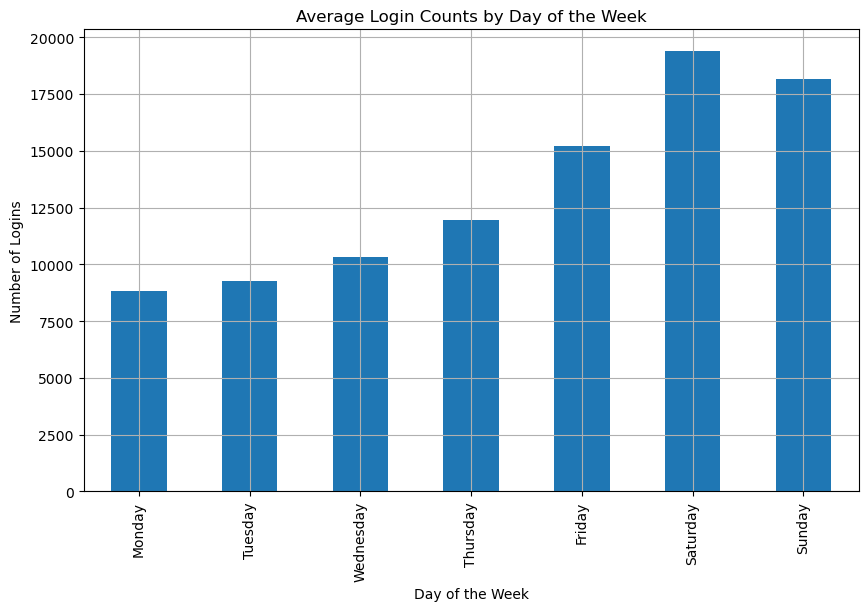

In [4]:
#adding a 'day_of_week' column to logins_df
logins_df['day_of_week'] = logins_df['login_time'].dt.day_name()

#grouping by day of the week and calculating mean login counts
day_of_week_counts = logins_df.groupby('day_of_week').size()

#sorting by days of the week
day_of_week_counts = day_of_week_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

#plotting login counts by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Average Login Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()


Most amounts of logins happen during the weekend, as traveling tends to be more common during the weekends.

# Part 2

The primary objective of this experiment is to increase driver availability in both cities (Gotham, Metropolis). A suitable key measure of success could be to increase in the number of unique drivers serving both cities. As this will mean the reimbursement has the intended effect of encouraging drivers to serve both cities.

Null Hypothesis (H0): Toll reimbursement does not affect the number of drivers serving both cities.

Alternative Hypothesis (H1): Toll reimbursement increases the number of drivers serving both cities.

To verify the significance of the observation, I conducted a two-sample t-test. The test compared the means of two independent groups  drivers in the test group vs. drivers in the control group to see if there is a statistically significant difference between them.

In [5]:
from scipy.stats import ttest_ind

# Made up data: number of drivers serving both cities in each group
test_group = [15, 18, 22, 17, 19, 21, 20, 23] 
control_group = [12, 10, 15, 13, 11, 14, 12, 16] 

# Perform t-test
t_stat, p_value = ttest_ind(test_group, control_group)

#results
alpha = 0.05  #significance level
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value = {p_value}). Reimbursement increases drivers serving both cities.")
else:
    print(f"Fail to reject the null hypothesis (p-value = {p_value}). No significant effect of reimbursement.")


Reject the null hypothesis (p-value = 8.089486540223803e-05). Reimbursement increases drivers serving both cities.


# Part 3

In [6]:
#check for missing values
missing_values = ultimate_data_df.isna().sum()

#display columns with missing values
print(missing_values[missing_values > 0])

avg_rating_of_driver    8122
phone                    396
avg_rating_by_driver     201
dtype: int64


In [12]:
#fill NaN with the median
ultimate_data_df['avg_rating_of_driver'] = ultimate_data_df['avg_rating_of_driver'].fillna(ultimate_data_df['avg_rating_of_driver'].median())

#fill with mode
ultimate_data_df['phone'] = ultimate_data_df['phone'].fillna(ultimate_data_df['phone'].mode()[0])

#fill NaN with the median
ultimate_data_df['avg_rating_by_driver'] = ultimate_data_df['avg_rating_by_driver'].fillna(ultimate_data_df['avg_rating_by_driver'].median())

In [13]:

print(ultimate_data_df.isna().sum())


city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64


In [14]:
#convert to datetime
ultimate_data_df['signup_date'] = pd.to_datetime(ultimate_data_df['signup_date'])
ultimate_data_df['last_trip_date'] = pd.to_datetime(ultimate_data_df['last_trip_date'])

#retention flag: retained if last_trip_date is within 30 days of the last date in the dataset
last_date = ultimate_data_df['last_trip_date'].max()
ultimate_data_df['retained'] = ultimate_data_df['last_trip_date'] >= (last_date - pd.Timedelta(days=30))

#calculate the fraction of retained users
retention_rate = ultimate_data_df['retained'].mean()
print(f"Retention Rate: {retention_rate:.2%}")


Retention Rate: 37.61%


In [15]:
from sklearn.model_selection import train_test_split

#selected features for the model
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
            'trips_in_first_30_days', 'surge_pct', 'weekday_pct', 'ultimate_black_user']

#define x and y
X = ultimate_data_df[features]
y = ultimate_data_df['retained']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


Model Accuracy: 67.16%
              precision    recall  f1-score   support

       False       0.68      0.90      0.77      6219
        True       0.64      0.30      0.41      3781

    accuracy                           0.67     10000
   macro avg       0.66      0.60      0.59     10000
weighted avg       0.66      0.67      0.64     10000

